In [23]:
import nltk
import pandas as pd
import glob
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
import seaborn as sns
import re

# initialize afinn sentiment analyzer
from afinn import Afinn
# Import the data set 
path = r'../data/raw/OpinosisDataset1.0_0/topics/'
allFiles = glob.glob(path + "/*.data")

def sentiment_plot(file_):
    with open(file_, "r") as f:
        review = f.readlines()
        filename_search = re.search(r'[^\\/:*?"<>|\r\n]+$', file_)
        filename_parts = filename_search.group()
        filename = filename_parts.split('.')[0] + '.jpg'
        # compute sentiment scores (polarity) and labels
        af = Afinn()
        sentiment_scores = [af.score(r) for r in review]
        sentiment_category = ['positive' if score >= 0 else 'negative' for score in sentiment_scores]
        # sentiment statistics per news category
        df = pd.DataFrame([sentiment_scores, sentiment_category]).T
        df.columns = ['sentiment_score', 'sentiment_category']
        df['sentiment_score'] = df.sentiment_score.astype('float')
        plt.figure()
        sns.set(style="whitegrid")
        bp = sns.boxplot( y="sentiment_score", 
                 data=df)
        bp.set(ylim=(-20, 20))
        bp.figure.savefig(r'../data/processed/sentiment/' + filename)   

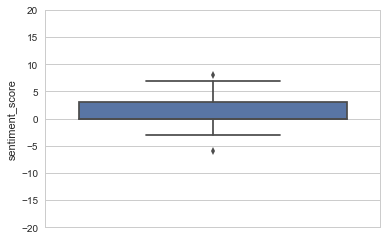

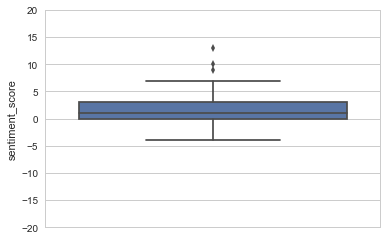

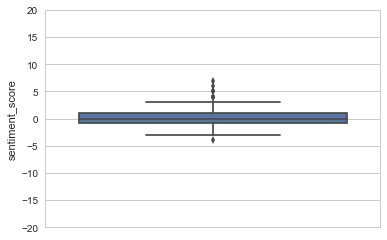

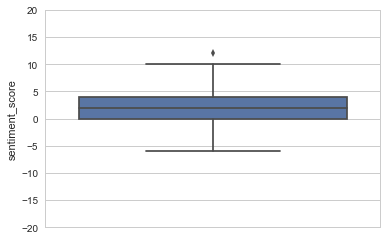

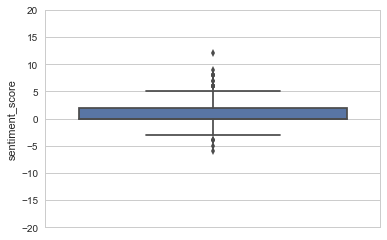

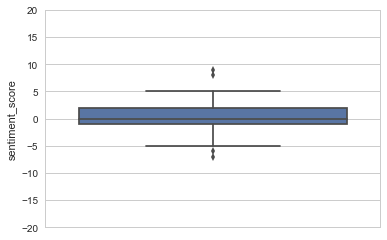

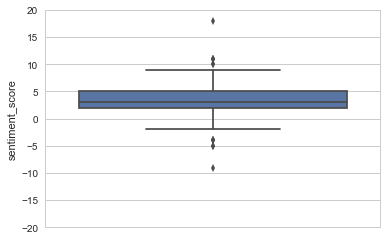

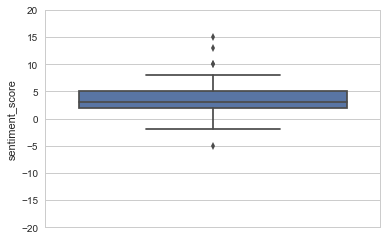

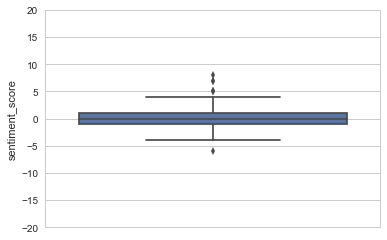

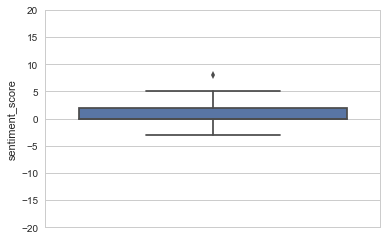

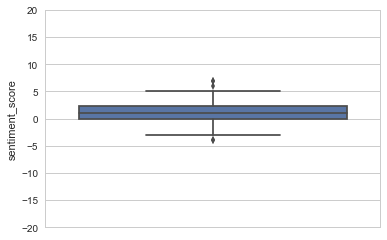

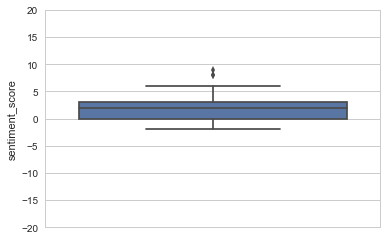

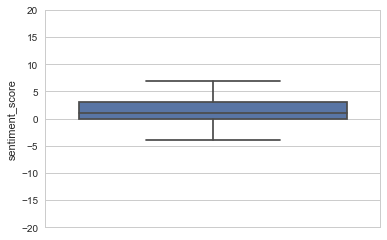

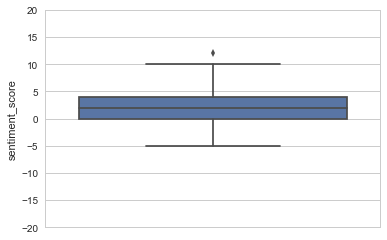

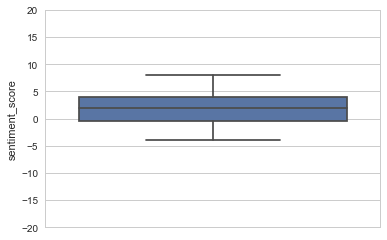

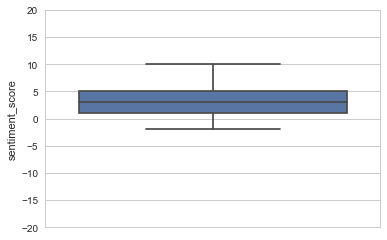

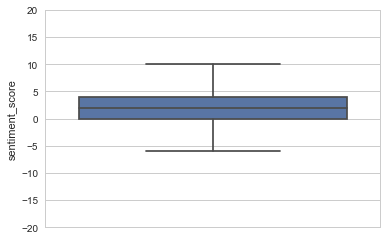

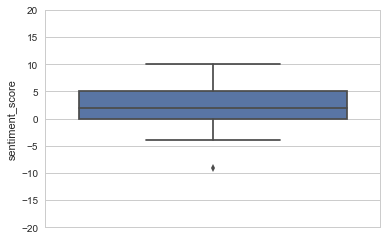

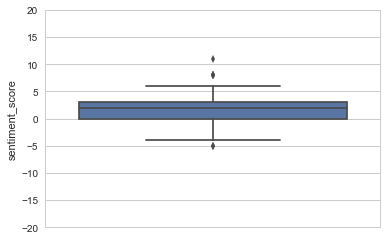

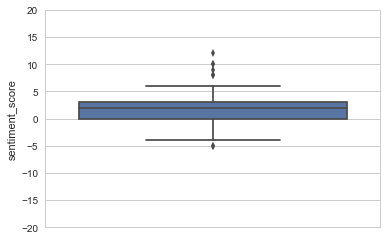

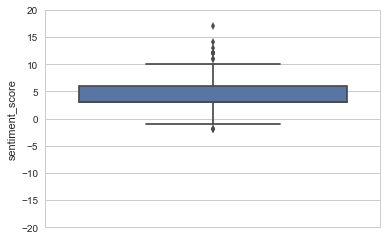

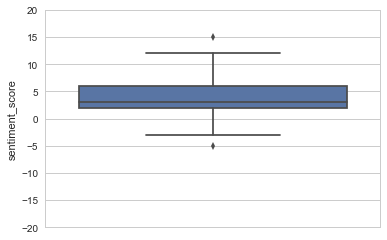

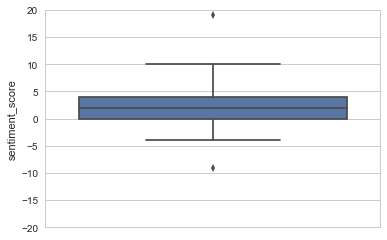

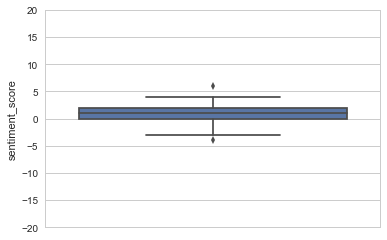

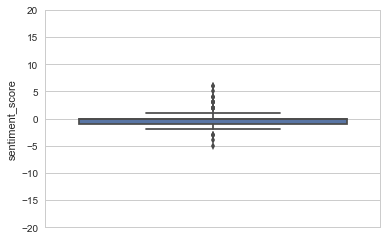

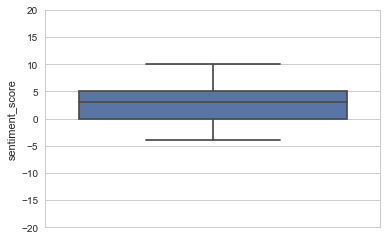

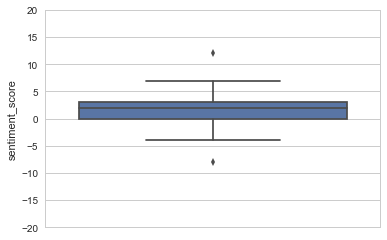

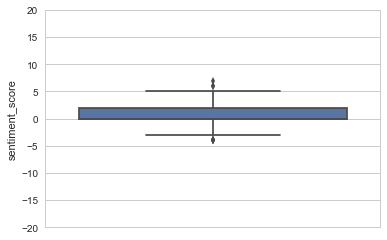

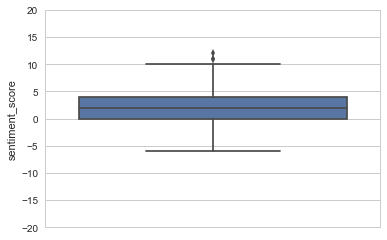

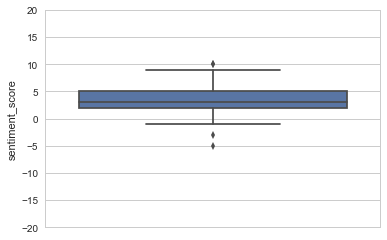

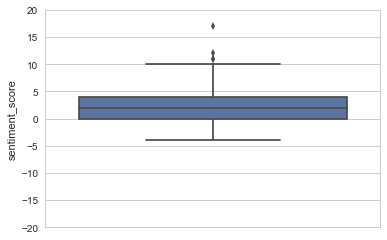

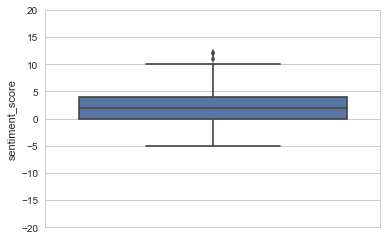

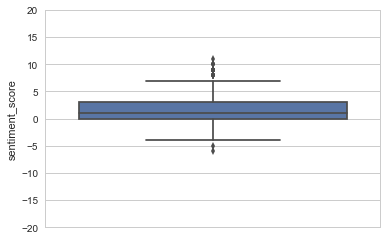

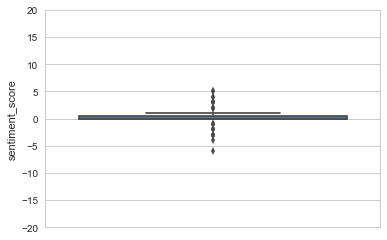

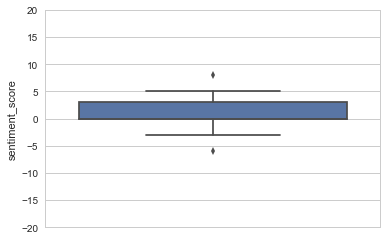

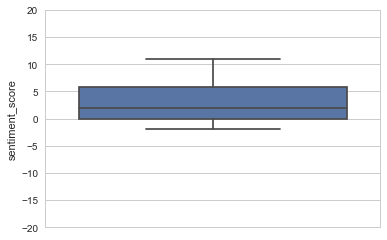

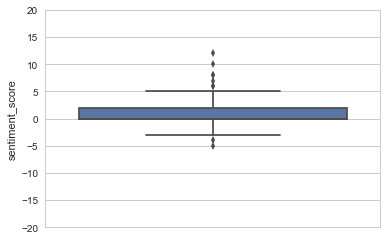

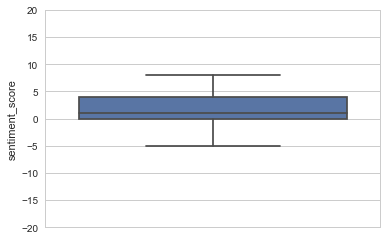

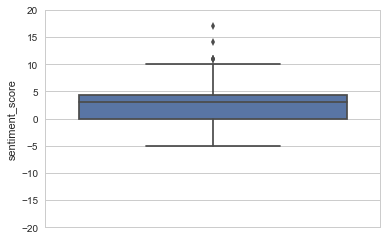

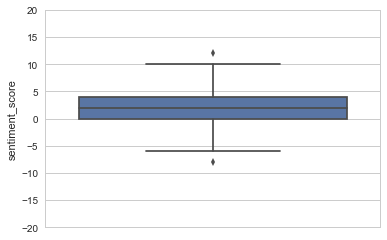

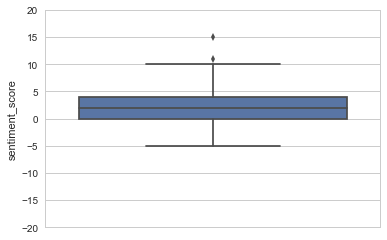

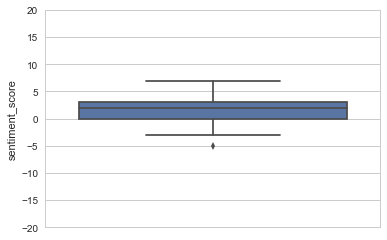

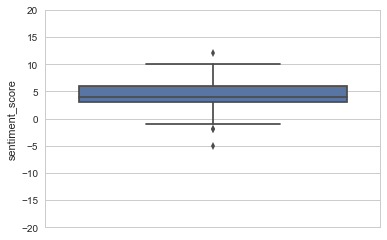

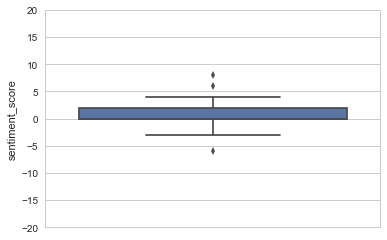

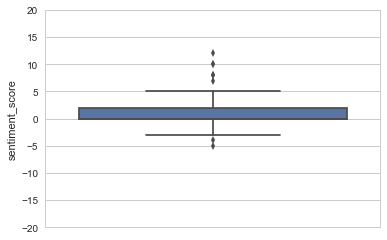

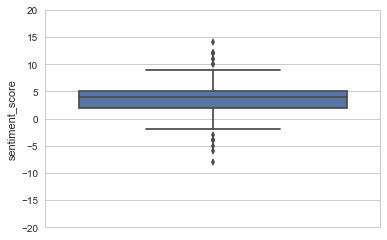

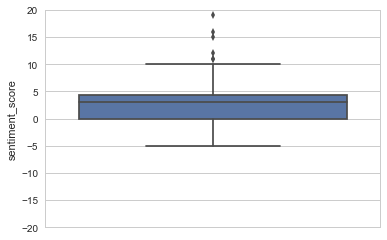

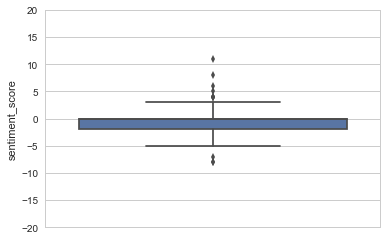

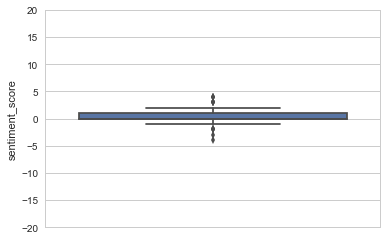

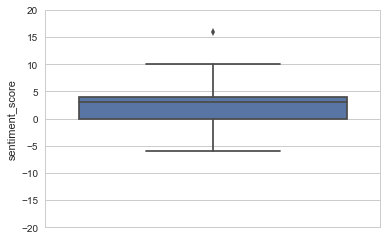

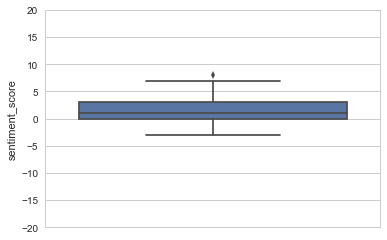

In [24]:
for file_ in allFiles:
    sentiment_plot(file_)

<BarContainer object of 7 artists>

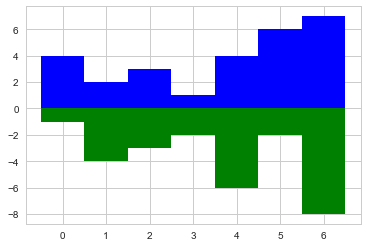

In [25]:
x = range(7)
negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = [4,2,3,1,4,6,7,]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=1, color='g')
ax.bar(x, positive_data, width=1, color='b')

In [116]:
def sentiment_plot(file_):
    with open(file_, "r") as f:
        review = f.readlines()
        filename_search = re.search(r'[^\\/:*?"<>|\r\n]+$', file_)
        filename_parts = filename_search.group()
        filename = filename_parts.split('.')[0] + '.jpg'
        # compute sentiment scores (polarity) and labels
        af = Afinn()
        sentiment_scores = [af.score(r) for r in review]
        sentiment_category = ['positive' if score >= 0 else 'negative' for score in sentiment_scores]
        # sentiment statistics per news category
        df = pd.DataFrame([sentiment_scores, sentiment_category]).T
        df.columns = ['sentiment_score', 'sentiment_category']
        df['sentiment_score'] = df.sentiment_score.astype('float')
        positive_and_negative = df.groupby(['sentiment_category']).count()
        fig = plt.figure()
        ax = plt.subplot(111)
        plt.axhline(0, color='black')
        x = filename
        ax.bar(x, -positive_and_negative.iloc[0], width=0.25, color='#0087BD')
        ax.bar(x, positive_and_negative.iloc[1], width=0.25, color='#0087BD')
        

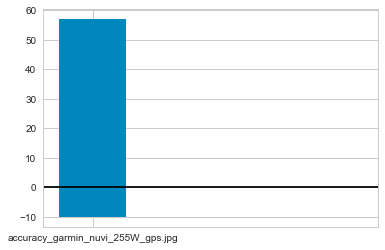

In [117]:
sentiment_plot(allFiles[0])